In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import datetime
import matplotlib.ticker as mtick

%matplotlib inline

/Users/gabrielfior/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [137]:
print 'reading...'
t0 = datetime.datetime.now()
columns_new2 =['trackId','parentId','volumeName','particleName','stepNumber',
                                                   'posX','posY','posZ','perp','kineeticEnergyDiff',
                                                   'edepStep','kineticEnergyPostStep','processName',
                                    'mompreX','mompreY','mompreZ','momposX','momposY','momposZ',
                  'stepLength','particleId'] 
filename = '/Volumes/UNTITLED/beam/Ar/mergedAr.csv'
#filename = '/Volumes/UNTITLED/beam/10minus4/merged10minus4.csv'
#filenameAr = 10cm_1e6_400GeV_Ar_cut1_5mm_nt_B4_g_processed.csv
density_expression = filename.split('.')[0][-1]
#density_expression = 7
df = pd.read_csv(filename,header=None,names=columns_new2)#,nrows=100000)
print 'elapsed: '+str(datetime.datetime.now()-t0)

reading...
elapsed: 0:01:53.641909


In [138]:
len(df.particleId.unique())

1000000

In [139]:
df.shape

(19938823, 21)

In [140]:
grouped = df.groupby(by=['particleId','particleName'],as_index=False).agg({'stepLength':sum,'edepStep':sum})

In [141]:
grouped['edep_mm'] = grouped.edepStep/grouped.stepLength
grouped['particleName'] = grouped.particleName.apply(lambda x: x.strip())

In [142]:
grouped.head()

,particleId,particleName,stepLength,edepStep,edep_mm
0,0.0,e-,3.623177,12113.4500,3343.322448
1,0.0,proton,100.000050,19235.9700,192.359604
2,1.0,e-,1.446857,7359.2160,5086.346474
3,1.0,proton,100.000048,22483.4211,224.834103
4,2.0,e-,3.790999,16173.9800,4266.416319


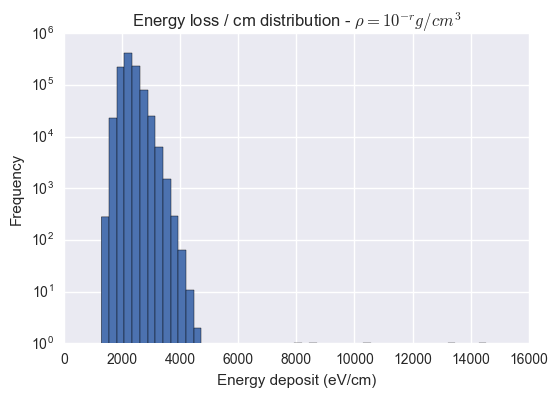

In [143]:
fig, ax = plt.subplots()
plt.hist(grouped[grouped.particleName=='proton'].edep_mm*10,bins=50)
plt.title(r'Energy loss / cm distribution - $\rho = 10^{-' +str(density_expression) +'} g/cm^3$')
ax.set_yscale('log')
#plt.xlim([-0.1,1.0])
plt.ylabel('Frequency')
plt.xlabel('Energy deposit (eV/cm)')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
#ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
#ax.semilogy()
plt.show()

mu=279.371529143, sigma=279.371529143


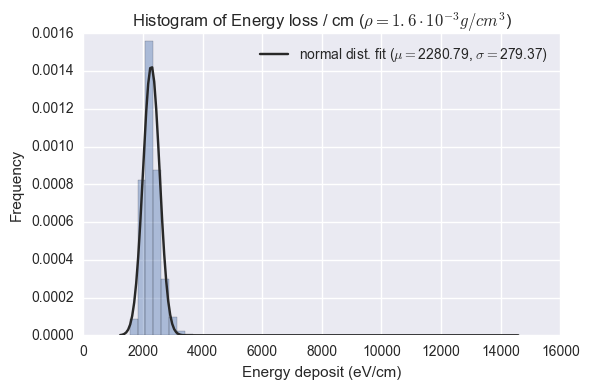

In [148]:

ax = sns.distplot(grouped[grouped.particleName=='proton'].edep_mm*10, bins=50, kde=False, fit=stats.norm);
#plt.title(r'Histogram of Energy loss / cm ($\rho = 10^{-' +str(density_expression) +'} g/cm^3$)')
plt.title(r'Histogram of Energy loss / cm ($\rho = 1.6 \cdot 10^{-' +'3' +'} g/cm^3$)')
# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(grouped[grouped.particleName=='proton'].edep_mm*10)
print "mu={1}, sigma={1}".format(mu, sigma)
#ax.set_yscale('log')
#ax.set_ylim([1e-15,1e13])
factor_sigma = 50.
#plt.xlim([-0.1,800])
#plt.xlim([12.58473,12.58480])
# Legend and labels 
plt.legend(["normal dist. fit ($\mu=${0:.2f}, $\sigma=${1:.2f})".format(mu, sigma)])
#plt.ylabel('log(Frequency)')
plt.ylabel('Frequency')
plt.xlabel('Energy deposit (eV/cm)')
#ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
#ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

plt.tight_layout()
plt.show()

In [50]:
np.histogram(grouped[grouped.particleName=='proton'].edep_mm*10)

(array([971358,  28641,      0,      0,      0,      0,      0,      0,
             0,      1]),
 array([   18.63021218,   200.28078255,   381.93135293,   563.58192331,
          745.23249368,   926.88306406,  1108.53363444,  1290.18420481,
         1471.83477519,  1653.48534557,  1835.13591595]))

In [ ]:
grouped[grouped.particleName=='proton'].edep_mm.hist(bins=50)

In [ ]:
len(df[df.particleName==' proton'].particleId.unique())

# Plot clusters

In [ ]:
W = 26.4 # eV argon
#W = 9.4 # eV, Rb

In [ ]:
toPlot = grouped[grouped.particleName=='proton'].edep_mm*10/W #energy loss / cm / W
ax = sns.distplot(toPlot, bins=50, kde=False, fit=stats.norm);
plt.title(r'Energy loss / cm distribution - $\rho = 10^{-' +str(density_expression) +'} g/cm^3$')
# Get the fitted parameters used by sns
(mu, sigma) = stats.norm.fit(toPlot)
print "mu={1}, sigma={1}".format(mu, sigma)
#ax.set_yscale('log')
#ax.set_ylim([1e0,1e10])
#plt.xlim([-0.1,1.0])
# Legend and labels 
plt.legend(["normal dist. fit ($\mu=${0:.2f}, $\sigma=${1:.2f})".format(mu, sigma)])
plt.ylabel('Frequency')
plt.xlabel('Energy deposit (eV/cm)')
#ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(True)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.show()